## 7.1 토픽 모델링과 LDA의 이해
### 7.1.1 토픽 모델링이란?
- 내재된 주제의 분석을 가능
- 시간에 따른 토픽 트렌드 분석 
### 7.1.2 LDA 모형의 구조
- 문서들이 쓰여질 때 그 문서를 구성하는 몇 개의 토픽이 존재하며 각 토픽은 단어의 집합으로 구성됐다.
- 내재한 토픽들을 유추하고자 하는 통계적 방법
- 문서의 토픽 분포가 **디리클래 분포**를 따른다고 가정
- 각 토픽의 단어분포를 알아내는 것이 목표
    - 각 단어의 빈도는 이 문서에 잠재된 토픽에 의해 결정, 각 토픽은 단어의 분포이므로 이것들이 결합되어 문서에 사용된 단어의 분포가 된다.
- 각 문서에 사용된 단어들의 빈도를 측정하고, 이로부터 역으로 모든 문서의 토픽분포와 각 토픽의 단어분포를 추정하는 것
### 7.1.3 모형의 평가와 적절한 토픽 수의 결정
- **Perplexity** 추정한 디리클레 모형이 주어진 문서 집합을 얼마나 유사하게 생성할 수 있는지 나타냄
- 값이 작을수록 토픽 모델이 문서집합을 잘 반영한다.
- **토픽 응집도** 각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지를 나타내는 척도
- 값이 클수록 좋다.
- **토픽의 해석이 사람이 보기에 자연스러운 것이 더 중요!!!**

## 7.2 사이킷런을 이용한 토픽 모델링

### 7.2.1 데이터 준비

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size : {}'.format(len(newsgroups_train.data)))
print('#Selectd categories : {}'.format(newsgroups_train.target_names))

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#Train set size : 3219
#Selectd categories : ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [2]:
# 사이킷런의 LDA 라이브러리는 CountVectorizer를 입력으로 사용한다.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, max_df=0.5, min_df=5)
review_cv = cv.fit_transform(newsgroups_train.data)

### 7.2.2 LDA 토픽 모델링 실행

In [3]:
from sklearn.decomposition import LatentDirichletAllocation  # LDA
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(
    n_components=10,          # 추출할 topic의 수
    max_iter=5,               # 알고리즘의 최대 반복 횟수
    topic_word_prior=0.1,     # 토픽의 사전 단어분포를 결정하는 매개변수
    doc_topic_prior=1.0,      # 문서의 사전 토픽분포를 결정
    learning_method='online', # batch보다 성능이 좋지만 느리다. 
    n_jobs=-1,
    random_state=0
)

review_topics = lda.fit_transform(review_cv)
print('#Shape of review_topics : {}'.format(review_topics.shape))
print('#Sample of review_topics : {}'.format(review_topics[0]))  # 첫 번째 문서의 각 토픽에 대한 분포 확인

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents : {}'.format(gross_topic_weights))  # 문서 전체에 나타난 토픽의 평균 분포

print('#shape of topic word distribution : {}'.format(lda.components_.shape))  # 토픽의 단어 분포

#Shape of review_topics : (3219, 10)
#Sample of review_topics : [0.903 0.007 0.027 0.008 0.007 0.008 0.007 0.007 0.007 0.018]
#Sum of topic weights of documents : [0.087 0.083 0.085 0.115 0.115 0.126 0.098 0.072 0.07  0.148]
#shape of topic word distribution : (10, 2000)


In [4]:
# 토픽별 비중이 높은 상위 단어들을 찾아 순서대로 출력
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d : " %topic_idx, end="")
        print(
            ", ".join([ feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1] ])
        )
    print()

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0 : com, morality, keith, article, sgi, think, sandvik, objective, caltech, moral
Topic #1 : image, file, graphics, files, ftp, available, software, use, data, mail
Topic #2 : space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3 : article, com, just, don't, like, i'm, nntp, university, host, posting
Topic #4 : key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5 : scsi, com, bit, ibm, bus, know, windows, thanks, card, university
Topic #6 : host, gov, nntp, posting, university, distribution, nasa, ___, world, com
Topic #7 : drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8 : key, public, message, faq, mail, pgp, des, group, uni, ripem
Topic #9 : god, people, don't, jesus, believe, just, does, say, think, know



### 7.2.3 최적의 토픽 수 선택하기

n_components : 6, perplexity : 1058.260
n_components : 7, perplexity : 1055.111
n_components : 8, perplexity : 1018.328
n_components : 9, perplexity : 1017.749
n_components : 10, perplexity : 1028.686
n_components : 11, perplexity : 1033.398
n_components : 12, perplexity : 1032.112
n_components : 13, perplexity : 1038.642
n_components : 14, perplexity : 1038.627
n_components : 15, perplexity : 1044.712


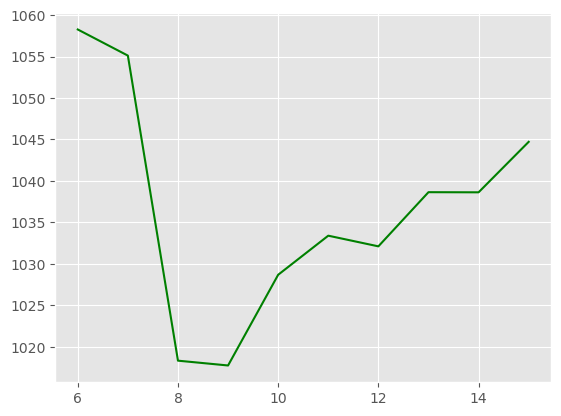

n_components with minimum perplexity : 9


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# 사이킷런의 LDA 라이브러리는 CountVectorizer를 입력으로 사용한다.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, max_df=0.5, min_df=5)
review_cv = cv.fit_transform(newsgroups_train.data)

# 혼잡도(perplexity) 계산
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1, doc_topic_prior=1.0):
    iter_num = []
    per_value = []
    
    for i in range(start, end+1):
        lda = LatentDirichletAllocation(
            n_components=i,
            max_iter=max_iter,
            topic_word_prior=topic_word_prior,
            doc_topic_prior=doc_topic_prior,
            learning_method='batch',
            n_jobs=-1,
            random_state=7
        )
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print("n_components : {0}, perplexity : {1:.3f}".format(i, pv))
    
    plt.plot(iter_num, per_value, 'g-')
    plt.show();

    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity : {}".format(show_perplexity(review_cv, start=6, end=15)))

In [6]:
lda = LatentDirichletAllocation(
    n_components=9,           # 추출할 topic의 수
    max_iter=20,              # 알고리즘의 최대 반복 횟수
    topic_word_prior=0.1,     # 토픽의 사전 단어분포를 결정하는 매개변수
    doc_topic_prior=1.0,      # 문서의 사전 토픽분포를 결정
    learning_method='batch',
    n_jobs=-1,
    random_state=7
)

review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0 : image, available, file, ftp, mail, data, files, information, graphics, internet
Topic #1 : nasa, space, gov, ___, center, orbit, earth, research, jpl, 1993
Topic #2 : com, keith, morality, caltech, sgi, objective, article, think, moral, don't
Topic #3 : jesus, god, just, com, know, article, john, good, don't, bible
Topic #4 : people, god, don't, does, think, say, believe, just, way, evidence
Topic #5 : drive, scsi, card, disk, ide, hard, controller, bus, bit, drives
Topic #6 : space, access, article, year, launch, just, digex, like, henry, toronto
Topic #7 : key, encryption, clipper, chip, government, com, keys, security, use, public
Topic #8 : com, posting, nntp, host, university, article, i'm, know, thanks, ibm



## 7.3 Gensim을 이용한 토픽 모델링
### 7.3.1 Gensim 사용법과 시각화

```python
pip install --upgrade gensim
```

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words('english')

RegTok = RegexpTokenizer(pattern="[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [ word for word in tokens if (word not in english_stops) and len(word)>2 ]
    return words

texts = [ tokenizer(news) for news in newsgroups_train.data ]

In [8]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionary 생성
dictionary = Dictionary(texts)
print("#Number of initial unique words in documents : {}".format(len(dictionary)))

# CountVectorizer()와 동일
# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(
    keep_n=2000,  # CountVectorizer의 max_features와 동일
    no_below=5,   # CountVectorizer의 min_df와 동일
    no_above=0.5  # CountVectorizer의 max_df와 동일
)

print('#Number of unique words after removing rare and common words : {}'.format(len(dictionary)))

# 카운트 벡터로 변환
# .fit_transform()과 동일
corpus = [ dictionary.doc2bow(text) for text in texts ]  # 토큰화 결과
print('#Number of unique tokens : %d' %len(dictionary))
print('#Number of documents : %d' %len(corpus))

#Number of initial unique words in documents : 46466
#Number of unique words after removing rare and common words : 2000
#Number of unique tokens : 2000
#Number of documents : 3219


In [10]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
model = LdaModel(corpus=corpus,        # 카운트 벡터 리스트 
                id2word=dictionary,    # dictionary
                passes=passes,         # LatentDirichletAllocation의 max_iter와 동일
                num_topics=num_topics, # 토픽의 수
                random_state=7)

model.print_topics(num_words=10)  # 각 토픽의 상위 10개 단어

[(0,
  '0.023*"com" + 0.018*"keith" + 0.016*"caltech" + 0.013*"sgi" + 0.013*"nntp" + 0.013*"posting" + 0.013*"host" + 0.012*"would" + 0.012*"system" + 0.011*"livesey"'),
 (1,
  '0.020*"morality" + 0.018*"objective" + 0.015*"one" + 0.015*"say" + 0.014*"uiuc" + 0.012*"frank" + 0.012*"values" + 0.010*"faq" + 0.010*"article" + 0.008*"cso"'),
 (2,
  '0.026*"com" + 0.025*"access" + 0.025*"posting" + 0.023*"host" + 0.023*"nntp" + 0.017*"digex" + 0.015*"article" + 0.013*"cwru" + 0.013*"___" + 0.013*"net"'),
 (3,
  '0.021*"university" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.013*"article" + 0.010*"com" + 0.009*"know" + 0.009*"i\'m" + 0.009*"would" + 0.009*"thanks"'),
 (4,
  '0.032*"com" + 0.015*"would" + 0.011*"article" + 0.010*"one" + 0.010*"get" + 0.009*"people" + 0.009*"ibm" + 0.008*"government" + 0.007*"good" + 0.007*"i\'m"'),
 (5,
  '0.025*"key" + 0.017*"encryption" + 0.014*"clipper" + 0.014*"chip" + 0.009*"keys" + 0.009*"use" + 0.008*"security" + 0.008*"government" + 0.008*"pub

In [11]:
# 첫 번째 문서에 대한 토픽 분포를 반환
print('#topic distribution of the first document : {}'.format(model.get_document_topics(bow=corpus)[0]))

#topic distribution of the first document : [(0, 0.72576934), (8, 0.2699505)]


In [12]:
# gensim 토픽 모델링 결과 시각화
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# LDA 모형을 pyLDAvis 객체에 전달
lda_viz = gensimvis.prepare(model, corpus, dictionary, n_jobs=1)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.137200  0.040249       1        1  22.655416
5      0.065990  0.123620       2        1  14.522776
9      0.072133  0.092872       3        1  12.987437
7      0.138320  0.043609       4        1  11.020437
4     -0.021828  0.007495       5        1   9.298365
6      0.072783 -0.094709       6        1   9.118869
3      0.027374 -0.054949       7        1   8.494165
0     -0.040786 -0.129974       8        1   4.524071
2      0.005359 -0.091972       9        1   4.051827
1     -0.182144  0.063761      10        1   3.326637, topic_info=            Term         Freq        Total Category  logprob  loglift
538        space  1487.000000  1487.000000  Default  30.0000  30.0000
20           com  3752.000000  3752.000000  Default  29.0000  29.0000
834          key  1316.000000  1316.000000  Default  28.0000  28.0000
1551        scsi   741.000000   741.000000  Default  27.0000  27.0000
70       posting  1723.000000  1723.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
65        people    64.445774  1672.571326  Topic10  -5.1558   0.1469
789          sci    53.265337   309.474053  Topic10  -5.3463   1.6436
602   university    56.862740  1487.218103  Topic10  -5.2810   0.1392
294         time    55.767882  1187.715297  Topic10  -5.3004   0.3446
315       better    54.193100   564.543676  Topic10  -5.3290   1.0597

[592 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      1  0.006274      128
1359      2  0.069013      128
1359      3  0.037643      128
1359      4  0.878342      128
153       1  0.057463     1993
...     ...       ...      ...
343       8  0.022394    years
343       9  0.005599    years
343      10  0.121303    years
704       3  0.991487      zoo
705       3  0.984036  zoology

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 8, 5, 7, 4, 1, 3, 2])

### 7.3.2 혼란도와 토픽 응집도를 이용한 최적값 선택

In [13]:
# 토픽 응집도 계산
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7493528544065975


num_topics: 6, perplexity: -7.035, coherence: -1.701
num_topics: 7, perplexity: -7.023, coherence: -1.735
num_topics: 8, perplexity: -7.023, coherence: -1.547
num_topics: 9, perplexity: -7.007, coherence: -1.891
num_topics: 10, perplexity: -6.996, coherence: -1.888
num_topics: 11, perplexity: -7.027, coherence: -2.164
num_topics: 12, perplexity: -7.019, coherence: -2.018
num_topics: 13, perplexity: -7.025, coherence: -2.255
num_topics: 14, perplexity: -7.020, coherence: -2.082
num_topics: 15, perplexity: -7.019, coherence: -2.521


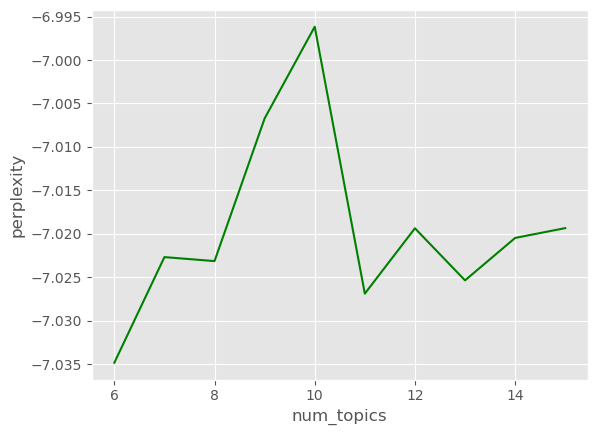

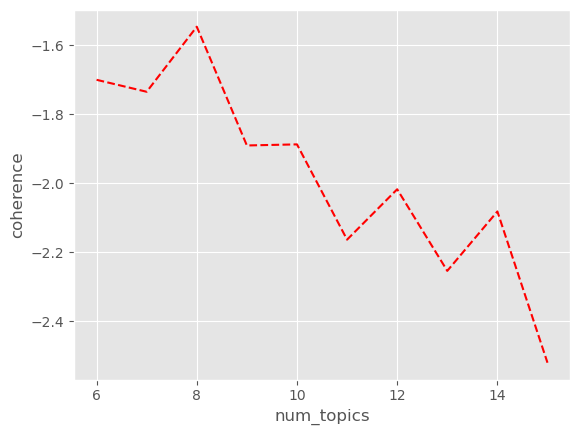

In [14]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                chunksize=1000, num_topics=i,
                random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)  # 혼란도
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()  # 토픽 응집도
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show();

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show();

show_coherence(corpus, dictionary, start=6, end=15)

## 7.4 토픽 트렌드로 시간에 따른 주제의 변화 알아내기

In [15]:
import pandas as pd

df = pd.read_csv("./data/petition_sampled.csv")
df.iloc[[2]]

,article_id,start,end,answered,votes,category,title,content
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
twit = Okt()

def tokenizer(doc):
    return [ token for token in twit.nouns(doc) if len(token)>2 ]

vec = CountVectorizer(
    tokenizer=tokenizer,
    max_df=0.5, min_df=5,
    max_features=1000
)

pet_cv = vec.fit_transform(df['content'])
print(pet_cv.shape)

d:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(18077, 1000)


In [17]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components = 15,
    n_jobs = 1,
    random_state = 0
)

pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] 
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, vec.get_feature_names_out(), 15)

Topic #0: 국회의원, 자동차, 시스템, 공매도, 러시아, 제주도, 강아지, 서울시, 동영상, 우리나라, 의원님, 위안부, 제대로, 고속도로, 정치인
Topic #1: 장애인, 이명박, 서비스, 출국금지, 경찰관, 운전자, 스스로, 홀딩스, 편의점, 보증금, 보행자, 재개발, 대체복무, 횡단보도, 오히려
Topic #2: 대통령, 문재인, 대한민국, 박근혜, 청와대, 부정부패, 빨갱이, 살인마, 민주당, 경찰청, 거짓말, 범죄자, 세월호, 노무현, 반드시
Topic #3: 청소년, 일자리, 어머니, 수수료, 여성가족부, 소년법, 미성년, 제대로, 최저임금, 여중생, 소유자, 아르바이트, 계약서, 알바생, 대기업
Topic #4: 공무원, 아파트, 음주운전, 지자체, 사업자, 태권도, 민간인, 국기원, 재건축, 사무소, 그린벨트, 저축은행, 임대주택, 형평성, 공공기관
Topic #5: 우리나라, 중소기업, 대기업, 민주주의, 대한민국, 지하철, 에어컨, 활성화, 발전소, 선진국, 태양광, 제대로, 경쟁력, 기회균등, 대부분
Topic #6: 근로자, 미세먼지, 고등학교, 자격증, 교육부, 대학교, 대부분, 관리자, 임산부, 이사장, 사교육, 공휴일, 근로시간, 한국인, 근무시간
Topic #7: 인터넷, 사이트, 쓰레기, 위원회, 담당자, 제대로, 대한민국, 워마드, 군복무, 페미니스트, 심지어, 페미니즘, 화장실, 홈페이지, 대부분
Topic #8: 부동산, 정규직, 비정규직, 아파트, 수도권, 지상파, 스포츠, 공공기관, 신혼부부, 정치인, 육아휴직, 직장인, 로스쿨, 대부분, 층간소음
Topic #9: 청와대, 김정은, 한반도, 게시판, 지도자, 가능성, 비핵화, 트럼프, 천안함, 이재용, 길거리, 반드시, 성추행, 미사일, 대한항공
Topic #10: 대한민국, 올림픽, 아버지, 간호사, 네이버, 상대로, 여러분, 범죄자, 국가대표, 따라서, 공권력, 태극기, 반드시, 양육비, 평창올림픽
Topic #11: 피해자, 국민연금, 가해자, 범죄자, 성

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

trend_data = pd.DataFrame(data = pet_topics, 
                        columns = [ 'Topic'+str(i) for i in range(1, 16)] )
trend_data = pd.concat([trend_data, df['start'].map(lambda x: x[:7])], axis=1)
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,start
0,0.002020,0.002020,0.566638,0.002020,2017-08
1,0.003509,0.461066,0.235313,0.003509,2017-08
2,0.004762,0.004762,0.004762,0.004762,2017-08
3,0.000926,0.000926,0.000926,0.000926,2017-08
4,0.001587,0.001587,0.001587,0.092703,2017-08


In [19]:
trend = trend_data.groupby(['start']).mean()
trend.iloc[:5, -5:]

,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,
2017-08,0.043498,0.053686,0.047989,0.038445,0.138338
2017-09,0.051202,0.109586,0.035601,0.052389,0.053582
2017-10,0.088063,0.082256,0.046671,0.074110,0.065426
2017-11,0.062766,0.106755,0.043614,0.052045,0.051261
2017-12,0.066791,0.070282,0.066060,0.057967,0.078660


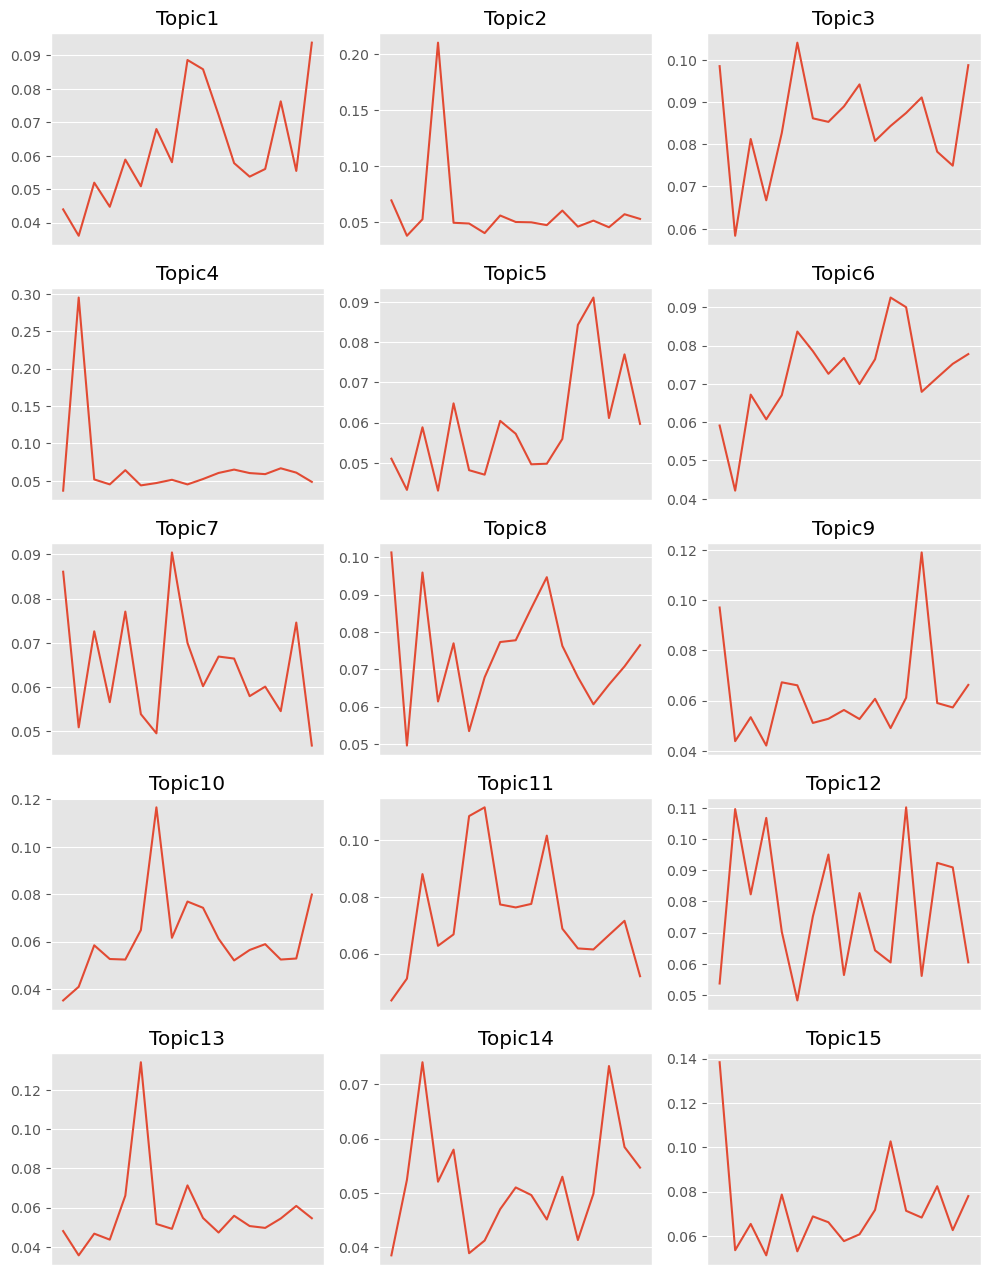

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, axes = plt.subplots(5, 3, sharex='col', figsize = (12,16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show();

## 7.5 동적 토픽 모델링

In [21]:
import pandas as pd

df = pd.read_csv('./data/petition_sampled.csv')
df_sorted = df.sort_values(by='start')  # 문서를 시작날짜 순으로 정렬

# time_slice를 생성. 월별로 변화를 보기 위해 연도와 월만 추출하여 time 열 생성
df_sorted['time'] = df_sorted['start'].map(lambda x:x[:7])

# 월별로 문서가 몇 건인지를 계산하여 time_slice에 저장
time_slice = list(
    df_sorted['time'].value_counts().sort_index()
)
print(time_slice, sum(time_slice))

[83, 906, 298, 1446, 926, 1514, 1304, 1097, 1217, 1301, 1246, 1291, 1390, 1155, 1277, 1187, 439] 18077


In [22]:
# 시간 구간을 리스트로 작성
time_tag = sorted(list(set(df_sorted['time'])))
print(time_tag)

['2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']


In [23]:
from gensim.corpora.dictionary import Dictionary
from konlpy.tag import Okt
twit = Okt()

def tokenizer(doc):
    text = [ token for token in twit.nouns(doc) if len(token)>1 ]
    return text

# 청원 데이터의 텍스트를 토큰화
texts = [ tokenizer(news) for news in df_sorted['content'] ]

# 토큰화 결과로부터 딕셔너리 생성
dictionary = Dictionary(texts)
print("#Number of initial unique words in documents : {}".format(len(dictionary)))

# CountVectorizer()와 동일
# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도순으로 선택
dictionary.filter_extremes(
    keep_n=2000,  # CountVectorizer의 max_features와 동일
    no_below=5,   # CountVectorizer의 min_df와 동일
    no_above=0.5  # CountVectorizer의 max_df와 동일
)
print("#Number of unique words after removing rare and common words : {}".format(dictionary))

# 카운트 벡터로 변환
# .fit_transform()과 동일
corpus = [ dictionary.doc2bow(text) for text in texts ]
print('#Number of unique tokens : %d' %len(dictionary))
print('#Number of documents : %d' %len(corpus))

#Number of initial unique words in documents : 36344
#Number of unique words after removing rare and common words : Dictionary<2000 unique tokens: ['감사', '강제', '거래', '건축', '경기도']...>
#Number of unique tokens : 2000
#Number of documents : 18077


num_topics: 6, perplexity: -6.903, coherence: -2.204
num_topics: 7, perplexity: -6.885, coherence: -2.174
num_topics: 8, perplexity: -6.886, coherence: -2.181
num_topics: 9, perplexity: -6.875, coherence: -2.323
num_topics: 10, perplexity: -6.860, coherence: -2.298
num_topics: 11, perplexity: -6.863, coherence: -2.355
num_topics: 12, perplexity: -6.864, coherence: -2.616
num_topics: 13, perplexity: -6.872, coherence: -2.333
num_topics: 14, perplexity: -6.884, coherence: -2.439
num_topics: 15, perplexity: -6.946, coherence: -2.452


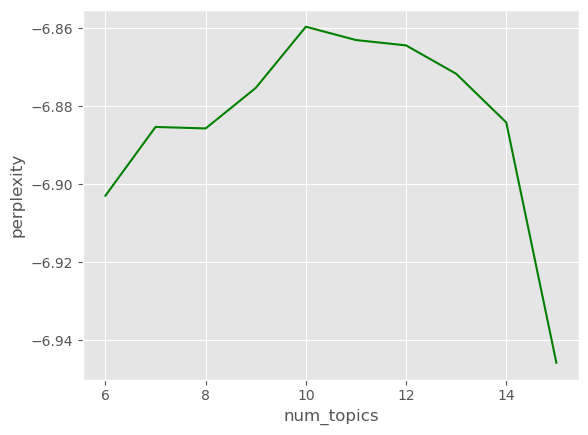

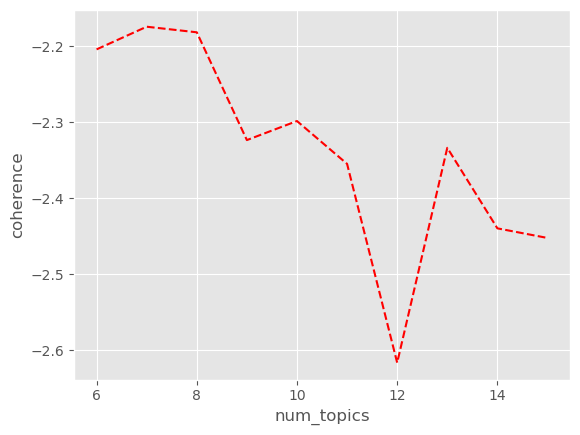

-3.4988502499291307
num_topics: 6, perplexity: -6.903, coherence: -2.204
num_topics: 7, perplexity: -6.885, coherence: -2.174
num_topics: 8, perplexity: -6.886, coherence: -2.181
num_topics: 9, perplexity: -6.875, coherence: -2.323
num_topics: 10, perplexity: -6.860, coherence: -2.298
num_topics: 11, perplexity: -6.863, coherence: -2.355
num_topics: 12, perplexity: -6.864, coherence: -2.616
num_topics: 13, perplexity: -6.872, coherence: -2.333
num_topics: 14, perplexity: -6.884, coherence: -2.439
num_topics: 15, perplexity: -6.946, coherence: -2.452


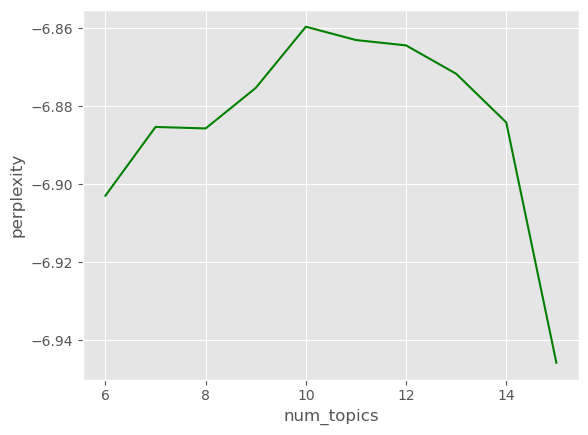

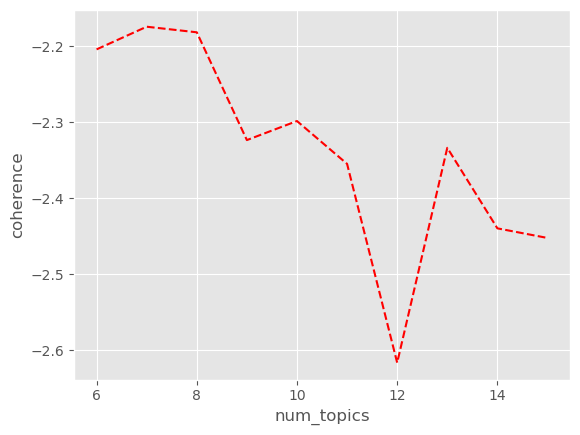

In [24]:
# 적절한 토픽 수를 알아보기 위해 토픽 수를 바꿔가면서 log_perplexity(혼란도)와 coherence(응집도)를 계산
from gensim.models import CoherenceModel

def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                chunksize=1000, num_topics=i,
                random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)  # 혼란도
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()  # 토픽 응집도
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show();

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show();

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)
show_coherence(corpus, dictionary, start=6, end=15)

In [25]:
# LdaSeqModel을 실행 - 305m 8.6s
from gensim.models import LdaSeqModel
import warnings
warnings.filterwarnings("ignore")

# 시간이 많이 소요됨
idaseq = LdaSeqModel(
    corpus=corpus,
    id2word=dictionary,
    time_slice=time_slice,
    num_topics=6,
    random_state=7
)

# 토픽 결과로부터 상위 n개의 단어만 반환하는 함수 작성
def get_topic_words(topic, top_n_words=10):
    words, _ = zip(*topic)
    return words[:top_n_words]

# 주어진 토픽에 대해 시간대별로 상위 단어를 간략하게 출력하는 함수 작성
def print_topic_times(model, topic, time_tag, top_n_words=10):
    topic_times = model.print_topic_times(topic)
    for i in range(len(topic_times)):
        print(time_tag[i] + ':', get_topic_words(topic_times[i], top_n_words))

In [26]:
# 4번 토픽에 대해 시간별로 상위 8개의 단어를 출력
print_topic_times(idaseq, 4, time_tag, 8)

2017-08: ('청소년', '보호', '경찰', '생각', '범죄', '폐지', '사건', '피해자')
2017-09: ('청소년', '보호', '생각', '범죄', '경찰', '폐지', '사건', '피해자')
2017-10: ('경찰', '범죄', '국민', '대한민국', '사람', '위해', '피해자', '청소년')
2017-11: ('경찰', '범죄', '국민', '사람', '대한민국', '위해', '사건', '생각')
2017-12: ('사람', '경찰', '범죄', '생각', '처벌', '대한민국', '국민', '피해자')
2018-01: ('사람', '선수', '처벌', '생각', '피해자', '여성', '범죄', '경찰')
2018-02: ('사람', '선수', '처벌', '생각', '여성', '피해자', '사회', '범죄')
2018-03: ('사람', '처벌', '여성', '생각', '피해자', '사회', '선수', '범죄')
2018-04: ('사람', '처벌', '생각', '여성', '피해자', '사회', '범죄', '사건')
2018-05: ('사람', '처벌', '생각', '여성', '피해자', '사건', '범죄', '사회')
2018-06: ('사람', '처벌', '생각', '여성', '피해자', '사회', '사건', '범죄')
2018-07: ('사람', '처벌', '생각', '여성', '피해자', '사건', '사회', '남성')
2018-08: ('사람', '생각', '처벌', '여성', '피해자', '사건', '남성', '사회')
2018-09: ('사람', '생각', '처벌', '여성', '사건', '피해자', '사회', '남성')
2018-10: ('사람', '처벌', '생각', '사건', '피해자', '여성', '사회', '범죄')
2018-11: ('사람', '처벌', '생각', '사건', '피해자', '여성', '사회', '범죄')
2018-12: ('사람', '처벌', '생각', '사건', '여성', '피해자', '

In [27]:
# 구간별로 문서 토픽 분포의 평균을 구해 토픽의 트렌드로 사용
def get_topic_trends(model, corpus, time_slice):
    dtm = model.dtm_vis(0, corpus)  # dtm_vis 메서드를 이용해 문서별 토픽 분포를 가져옴
    result = []
    start = 0
    for index in time_slice:  # 각 구간별 문서들에 대해 토픽 분포의 평균을 구함
        result.append(np.array(dtm[0][start:start+index]).mean(axis=0))  # 각 시간 단위별 토픽 분포의 평균
        start += index
    return np.array(result)

topic_trends = get_topic_trends(idaseq, corpus, time_slice)

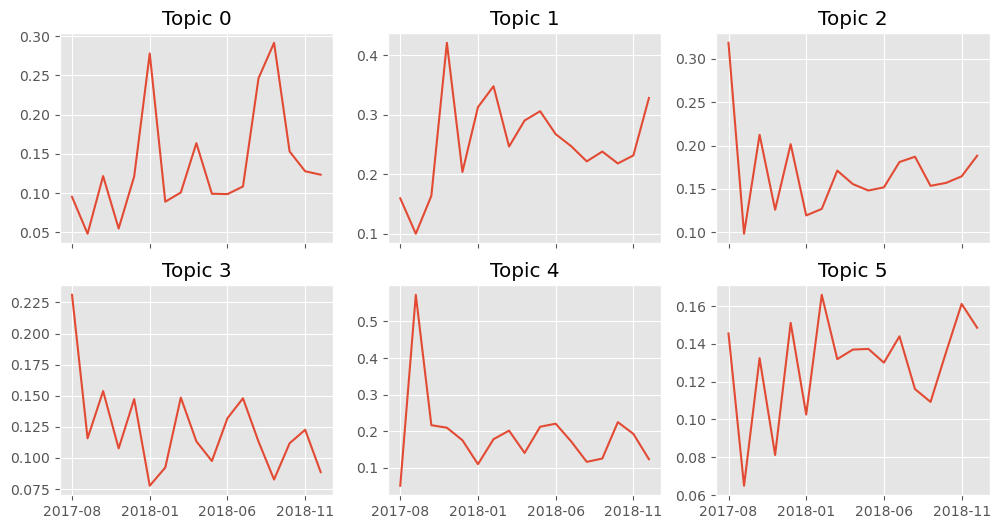

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

topic_titles = [ 'Topic '+ str(i) for i in range(6) ]  # 토픽 타이틀 생성
fig, axes = plt.subplots(2,3, sharex='col', figsize=(12,6))
for i, (title, ax) in enumerate(zip(topic_titles, axes.ravel())):
    ax.set_title(title)
    ax.set_xticks([0, 5, 10, 15])
    ax.set_xticklabels(time_tag[::5])
    ax.plot(topic_trends[:, i])

plt.savefig('dtm.png')
plt.show();

In [30]:
# gensim 토픽 모델링 시각화
import pyLDAvis
pyLDAvis.enable_notebook()

# 특정 time_slice의 토픽 분포를 시각화 - ldaseq.dtm_vis() 메서드를 이용
doc_topic, topic_term, doc_length, term_frequency, vocab = idaseq.dtm_vis(time = 0, corpus = corpus)

vis_dtm = pyLDAvis.prepare(
    topic_term_dists=topic_term,
    doc_topic_dists=doc_topic,
    doc_lengths=doc_length,
    vocab=vocab,
    term_frequency=term_frequency,
    n_jobs=1
)

pyLDAvis.display(vis_dtm)  # 결과를 출력

In [31]:
pyLDAvis.save_html(vis_dtm, './data/lda_time0.html')  # html 파일로 저장